<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 앙상블 분류기의 평가와 튜닝

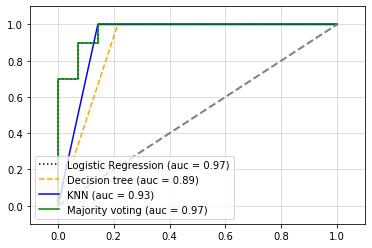

In [0]:
# ROC곡선 그리기
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = y_pred)

  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color = clr, linestyle = ls, label = '%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc = 'lower left')
plt.plot([0,1],[0,1], linestyle = '--', color = 'gray', linewidth = 2)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha = 0.5)
plt.show()

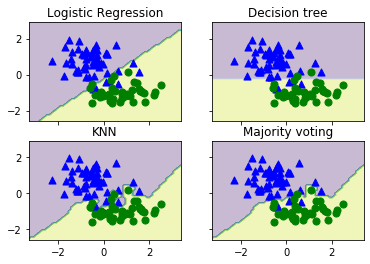

In [0]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

from itertools import product

x_min = X_train_std[:,0].min() - 1
x_max = X_train_std[:,0].max() + 1
y_min = X_train_std[:,1].min() - 1
y_max = X_train_std[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows = 2, ncols = 2, sharex = 'col', sharey = 'row')

for idx, clf, tt in zip(product([0,1], [0,1]), all_clf, clf_labels):
  clf.fit(X_train_std, y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha = 0.3)
  axarr[idx[0], idx[1]].scatter(X_train_std[y_train == 0, 0],
                                X_train_std[y_train == 0, 1], c = 'blue', marker = '^', s =50)
  axarr[idx[0], idx[1]].scatter(X_train_std[y_train == 1, 0],
                                X_train_std[y_train == 1, 1], c = 'green', marker = 'o', s =50)
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 배깅

In [0]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data', header = None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total Phenols',
                   'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [0]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = None)
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, max_samples = 1.0, max_features = 1.0,
                        bootstrap = True, bootstrap_features = False, n_jobs = 1, random_state = 1)


In [0]:
# 결정트리
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print(tree_train, tree_test)

1.0 0.8333333333333334


In [0]:
# 배깅분류기
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print(bag_train, bag_test)


1.0 0.9166666666666666


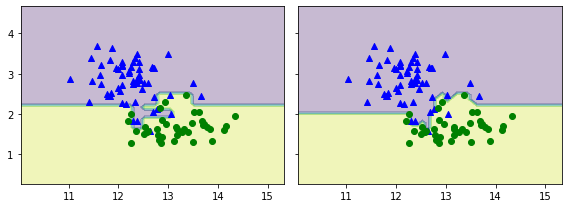

In [0]:
# 결정트리와 배깅분류기의 결정경계 비교

x_min = X_train[:,0].min() - 1
x_max = X_train[:,0].max() + 1
y_min = X_train[:,1].min() - 1
y_max = X_train[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f,axarr = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row', figsize = (8,3))
for idx, clf, tt in zip([0,1], [tree, bag], ['Decision tree', 'Bagging']):
  clf. fit(X_train, y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx].contourf(xx, yy, Z, alpha = 0.3)
  axarr[idx].scatter(X_train[y_train == 0, 0],
                     X_train[y_train == 0, 1], c = 'blue', marker = '^')
  axarr[idx].scatter(X_train[y_train == 1, 0],
                     X_train[y_train == 1, 1], c = 'green', marker = 'o')

plt.tight_layout()
plt.show()

# 에이다부스트

부스팅 알고리즘
1. 중복을 허용하지 않고 추출 후 분류기를 통한 학습
2. 중복을 허용하지 않고 추출 후 1에서 잘못된 분류의 50%를 더한후 다른 분류기를 통한 학습
3. 다수결

과대적합이 높다는 것이 단점.

In [0]:
# 사이킷런으로 에이다부스트 구현
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = 1)
ada = AdaBoostClassifier(base_estimator = tree, n_estimators = 500, learning_rate = 0.1, random_state = 1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(tree_train, tree_test)


0.9157894736842105 0.875


In [0]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print(ada_train, ada_test)

1.0 0.9166666666666666


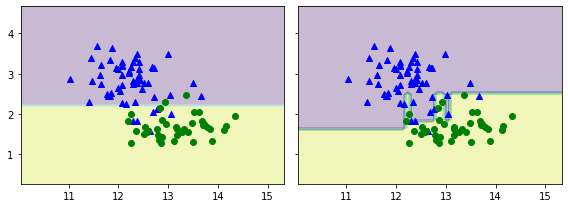

In [0]:
#결정영역
x_min = X_train[:,0].min() - 1
x_max = X_train[:,0].max() + 1
y_min = X_train[:,1].min() - 1
y_max = X_train[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f,axarr = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row', figsize = (8,3))
for idx, clf, tt in zip([0,1], [tree, ada], ['Decision tree', 'AdaBoost']):
  clf. fit(X_train, y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx].contourf(xx, yy, Z, alpha = 0.3)
  axarr[idx].scatter(X_train[y_train == 0, 0],
                     X_train[y_train == 0, 1], c = 'blue', marker = '^')
  axarr[idx].scatter(X_train[y_train == 1, 0],
                     X_train[y_train == 1, 1], c = 'green', marker = 'o')

plt.tight_layout()
plt.show()

# Gradient Boosting

In [0]:
#적합도는 adaboost와 비슷

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators = 20, random_state = 42)
gbrt.fit(X_train, y_train)

gbrt_train_score = gbrt.score(X_train, y_train)
gbrt_test_score = gbrt.score(X_test, y_test)

print(gbrt.n_estimators_)
print(gbrt_train_score, gbrt_test_score)

20
1.0 0.9166666666666666
